Frequency Analysis

In [1]:
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")

In [2]:
from uilc.methods import pw
from uilc.radiation import lambertian
from uilc.utils.misc import d2, extend_signal
from uilc.utils.misc import extend_signal

import numpy as np
from matplotlib import pyplot as plt
from typing import Callable, Tuple
from scipy import signal
from scipy.interpolate import interp1d
from scipy.fft import fft, fftfreq, ifft
from copy import deepcopy

In [3]:
#Optical system setting
cm = 1E-2
s = 10
W = 4*cm
H = 2*cm

In [4]:
nmax = pw.nmax(s, W, H)
print(nmax)

7


In [5]:
n = 10

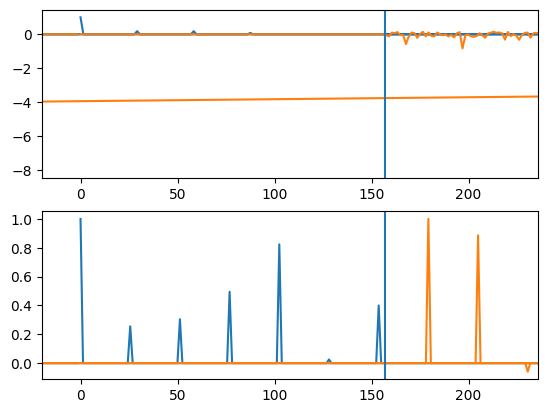

In [6]:
#ns = [nmax, int(1.5*nmax), int(3*nmax), int(4*nmax), int(6*nmax)]
ns  = [nmax, 6*nmax]
plot_data = [pw.get_signal_decomposition(n, s, W, H, ext_n=20, rate =240) for n in ns]
fig = plt.figure()
row = len(plot_data)
for i, (xf, sig_low, sig_high) in enumerate(plot_data):
    ax = fig.add_subplot(row, 1, i+1)
    ax.plot(xf, sig_low/sig_low.max())
    ax.plot(xf, sig_high/sig_high.max())
    ax.set_xlim([-20, 3*np.pi/(W)])
    ax.axvline(2*np.pi/W)
L = [1, 2, 3, 6]
#for n in L:
#    ax.axvline(2*np.pi/(n*W))

#ax.axvline(np.pi/W)
plt.show()

In [7]:
delta, pos, K = pw.power_weight(s, W, H, dim = int(2*nmax), set_nmax=False)
si, t = pw.resample_n(delta, pos, 6)
si_low, si_high = pw.signal_decomposition(si, t, 2*np.pi/W)
si_low = si_low.real
si_high = si_high.real
index, _ = signal.find_peaks(si_low)


(-0.02, 0.02)

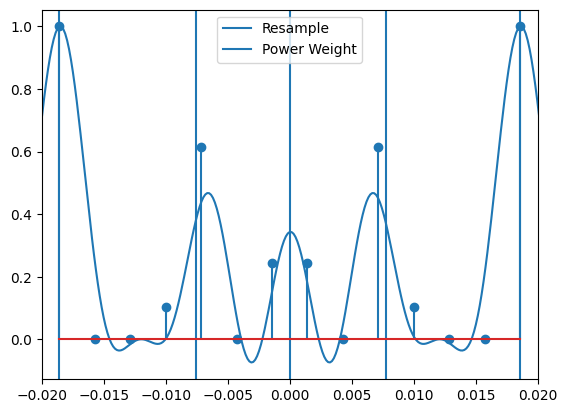

In [8]:
fig = plt.figure()
ax = fig.add_subplot()

#dt = 2.5*(t[1]-t[0])
#t += dt

mark_text = []
ax.plot(t, si/si.max())
mark_text.append("Resample")
#ax.plot(t, si_low/si_low.max())
#mark_text.append("Low Frequency")
#ax.plot(t, si_high/si_high.max())
#mark_text.append("High Frequency")

for i in index:
    ax.axvline(x=t[i])
ax.stem(pos, delta/delta.max())
mark_text.append("Power Weight")

ax.legend(mark_text)
ax.set_xlim([-W/2, W/2])


(-0.02, 0.02)

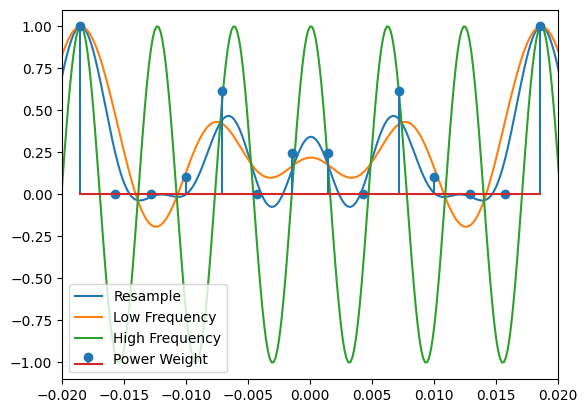

In [9]:
fig = plt.figure()
ax = fig.add_subplot()

#dt = 2.5*(t[1]-t[0])
#t += dt

mark_text = []
#t_p = t-center_shifted
ax.plot(t, si/si.max())
mark_text.append("Resample")
ax.plot(t, si_low/si_low.max())
mark_text.append("Low Frequency")
ax.plot(t, si_high/si_high.max())
mark_text.append("High Frequency")

#for i in index:
#    ax.axvline(x=t[i])
ax.stem(pos, delta/delta.max())
mark_text.append("Power Weight")

ax.legend(mark_text)
ax.set_xlim([-W/2, W/2])


In [10]:
from scipy.signal import find_peaks

In [11]:
t_in = np.where(t <W/2)
t_sample = t[t_in]
sig_low = si_low[t_in]
sig_high = si_high[t_in]

t_in2 = np.where(-W/2< t_sample)
t_sample = t_sample[t_in2]
sig_low = sig_low[t_in2]
sig_high = sig_high[t_in2]

In [12]:
index_s_low = find_peaks(sig_low)[0]
index_s_high = find_peaks(sig_high)[0]

In [13]:
index_s_low

array([  9,  80, 129, 179, 249], dtype=int64)

In [14]:
s_arr_low = t_sample[index_s_low]
s_arr_high = t_sample[index_s_high]

In [15]:
from uilc.radiation import lambertian_1d

In [16]:
source = s_arr_low - (s_arr_low.max() + s_arr_low.min())/2

In [26]:
arr = s_arr_low - (s_arr_low.max() + s_arr_low.min())/2

In [45]:
# low frequncy result
source = np.append(arr, [-W/2, W/2])
#source =s_arr_low
xarr = np.linspace(-W/2, W/2, 400, endpoint=True)

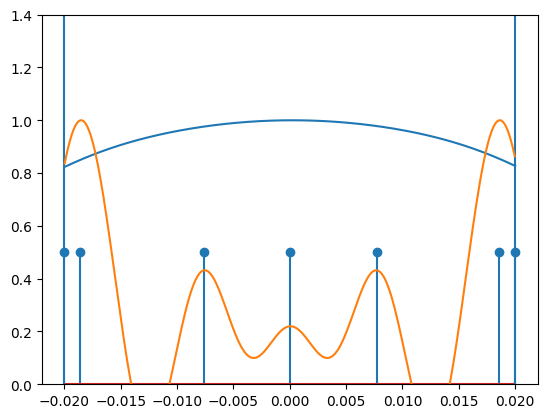

Mean, Max, Min/Max, std/Max
0.9448, 1.0000, 0.8227, 0.0512


In [46]:
y_rad = lambertian_1d(xarr, source, s, W, H)
y_rad = y_rad/y_rad.max()
fig = plt.figure()
ax = fig.add_subplot()
ax.stem(source, 0.5*np.ones(len(source)))
ax.plot(xarr, y_rad)
ax.axvline(-W/2)
ax.axvline(W/2)
ax.plot(t_sample, sig_low/sig_low.max())
ax.set_ylim([0, 1.4])
plt.show()

print("Mean, Max, Min/Max, std/Max")
ma = y_rad.max()
print(f"{y_rad.mean():.4f}, {ma:.4f}, {y_rad.min()/ma:.4f}, {y_rad.std()/ma:.4f}")


In [47]:
# High frequncy result
source = np.append(s_arr_high, [-W/2, W/2])

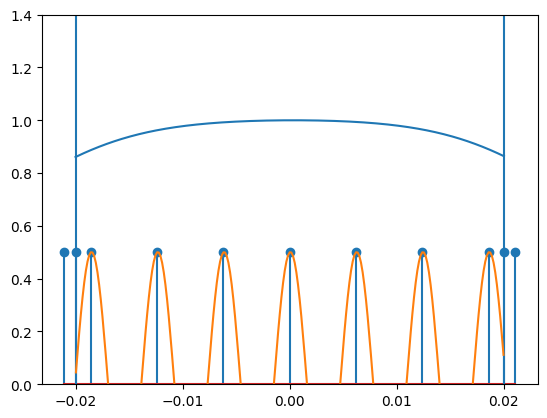

Mean, Max, Min/Max, std/Max
0.9630, 1.0000, 0.8609, 0.0391


In [44]:
y_rad = lambertian_1d(xarr, source, s, W, H)
y_rad = y_rad/y_rad.max()
fig = plt.figure()
ax = fig.add_subplot()
ax.stem(source, 0.5*np.ones(len(source)))
ax.plot(xarr, y_rad)
ax.axvline(-W/2)
ax.axvline(W/2)
ax.plot(t_sample, 0.5*sig_high/sig_high.max())
ax.set_ylim([0, 1.4])
plt.show()

print("Mean, Max, Min/Max, std/Max")
ma = y_rad.max()
print(f"{y_rad.mean():.4f}, {ma:.4f}, {y_rad.min()/ma:.4f}, {y_rad.std()/ma:.4f}")


In [35]:
s_arr_high[4] = 0
s_arr_high[7] = 0

In [52]:
source = np.append(s_arr_low, [-W/2, W/2])

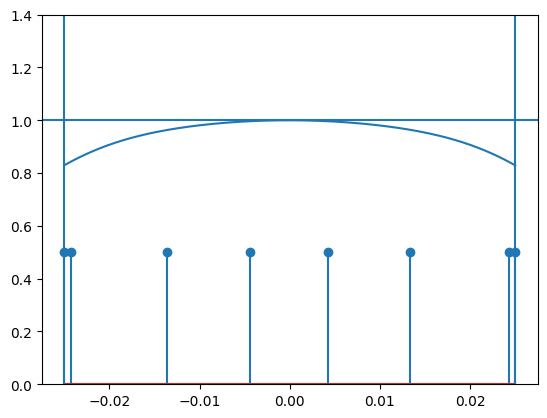

Mean, Max, Min/Max, std/Max
0.9516, 1.0000, 0.8294, 0.0481


In [55]:
y_rad = lambertian_1d(xarr, source, s, W, H)
y_rad = y_rad/y_rad.max()
fig = plt.figure()
ax = fig.add_subplot()
ax.stem(source, 0.5*np.ones(len(source)))
ax.plot(xarr, y_rad)
ax.axvline(-W/2)
ax.axvline(W/2)
ax.set_ylim([0, 1.4])
ax.axhline(y = 1)
plt.show()

print("Mean, Max, Min/Max, std/Max")
ma = y_rad.max()
print(f"{y_rad.mean():.4f}, {ma:.4f}, {y_rad.min()/ma:.4f}, {y_rad.std()/ma:.4f}")


---

Power weight map with number calculation.

1. Calculate power weight.
2. Normalization, Extending, Resampling.
3. Applying Low/high pass filter with band: $f_b = \frac{2 \pi}{W}$.


### Power weighting

$n$: number of the peaks after (3), 
${w_i}_{i=1}^n$: peak values.

Source location = peak location

### Distribution

Decompose into 


